In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import re  # <--- IMPORT THIS for the formatting
import random

In [21]:
##Import DFT results
df_oxides_dft = pd.read_csv('../data/DFT_representatives/results_DFT_oxides.csv')
df_sulfides_dft = pd.read_csv('../data/DFT_representatives/results_DFT_sulfides.csv')
df_selenides_dft = pd.read_csv('../data/DFT_representatives/results_DFT_selenides.csv')
df_tellurides_dft = pd.read_csv('../data/DFT_representatives/results_DFT_tellurides.csv')

##Import MACE results
df_oxides_mace = pd.read_csv('../data/Final_data/results_oxide_all.csv')
df_sulfides_mace = pd.read_csv('../data/Final_data/results_sulfide_all.csv')
df_selenides_mace = pd.read_csv('../data/Final_data/results_selenide_all.csv')
df_tellurides_mace = pd.read_csv('../data/Final_data/results_telluride_all.csv')

In [22]:
df_oxides_mace['MACE-Lattice'] = (df_oxides_mace['a_normal']+df_oxides_mace['b_normal']+df_oxides_mace['c_normal'])/3
df_oxides_mace['MACE-Energy'] = df_oxides_mace['energy_normal']
df_sulfides_mace['MACE-Lattice'] = (df_sulfides_mace['a_normal']+df_sulfides_mace['b_normal']+df_sulfides_mace['c_normal'])/3
df_sulfides_mace['MACE-Energy'] = df_sulfides_mace['energy_normal']
df_selenides_mace['MACE-Lattice'] = (df_selenides_mace['a_normal']+df_selenides_mace['b_normal']+df_selenides_mace['c_normal'])/3
df_selenides_mace['MACE-Energy'] = df_selenides_mace['energy_normal']
df_tellurides_mace['MACE-Lattice'] = (df_tellurides_mace['a_normal']+df_tellurides_mace['b_normal']+df_tellurides_mace['c_normal'])/3
df_tellurides_mace['MACE-Energy'] = df_tellurides_mace['energy_normal']

In [23]:
df_oxides_dft

,Formula,DFT-Lattice,DFT-Energy
0,CdAl2O4,8.465856,-360.2016
1,CdGa2O4,8.719923,-301.2303
2,CdIn2O4,9.215525,-282.9025
3,GeMg2O4,8.333698,-349.6880
4,GeZn2O4,8.444816,-295.0205
5,MgGa2O4,8.445721,-335.8851
6,MgIn2O4,8.982278,-314.9239
7,SnMg2O4,8.642507,-339.0641
8,ZnAl2O4,8.176515,-374.0836
9,ZnGa2O4,8.452551,-312.4214


In [24]:
df_oxides_mace

,Formula,A,B,X,a_normal,b_normal,c_normal,angle_a_normal,angle_b_normal,angle_c_normal,...,Ehull_min,Ehull_min_type,SuperScore,inversion_parameter,delta_E,SMACT_low,SMACT_medium,SMACT_high,MACE-Lattice,MACE-Energy
0,AgAg2O4,Ag,Ag,O,9.226805,9.226805,9.226805,90.0,90.0,90.0,...,0.203885,equal,0.450,NaN,-0.000000,True,False,False,9.226805,-219.903159
1,AgAl2O4,Ag,Al,O,8.425128,8.425128,8.425128,90.0,90.0,90.0,...,0.104262,normal,0.480,0.00,4.670252,True,False,False,8.425128,-358.219855
2,AgAs2O4,Ag,As,O,9.105222,9.105222,9.105222,90.0,90.0,90.0,...,0.106265,inverse,0.455,1.00,-10.896140,True,False,False,9.105222,-294.125390
3,AgAu2O4,Ag,Au,O,9.396181,9.396181,9.396181,90.0,90.0,90.0,...,0.161421,inverse,0.190,0.99,-0.130483,True,False,False,9.396181,-229.236827
4,AgB2O4,Ag,B,O,7.903948,7.903948,7.903948,90.0,90.0,90.0,...,0.142806,inverse,0.600,1.00,-61.796662,True,False,False,7.903948,-316.575469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,ZrW2O4,Zr,W,O,9.222642,9.222642,9.222642,90.0,90.0,90.0,...,1.516774,normal,NaN,NaN,0.437412,True,False,False,9.222642,-441.718972
5053,ZrY2O4,Zr,Y,O,9.471328,9.471328,9.471328,90.0,90.0,90.0,...,0.186146,inverse,NaN,NaN,-3.892638,True,False,False,9.471328,-499.782902
5054,ZrYb2O4,Zr,Yb,O,9.315554,9.315554,9.315554,90.0,90.0,90.0,...,NaN,NaN,NaN,NaN,-0.108169,True,True,False,9.315554,-433.400235
5055,ZrZn2O4,Zr,Zn,O,8.796217,8.796217,8.796217,90.0,90.0,90.0,...,0.121095,inverse,NaN,NaN,-3.321407,True,True,True,8.796217,-363.621126


In [25]:
df_oxides = df_oxides_dft.merge(df_oxides_mace[['Formula', 'MACE-Lattice', 'MACE-Energy', 'SuperScore']], on='Formula')
df_sulfides = df_sulfides_dft.merge(df_sulfides_mace[['Formula', 'MACE-Lattice', 'MACE-Energy', 'SuperScore']], on='Formula')
df_selenides = df_selenides_dft.merge(df_selenides_mace[['Formula', 'MACE-Lattice', 'MACE-Energy', 'SuperScore']], on='Formula')
df_tellurides = df_tellurides_dft.merge(df_tellurides_mace[['Formula', 'MACE-Lattice', 'MACE-Energy', 'SuperScore']], on='Formula')

In [26]:
df_oxides

,Formula,DFT-Lattice,DFT-Energy,MACE-Lattice,MACE-Energy,SuperScore
0,CdAl2O4,8.465856,-360.2016,8.470442,-361.759228,0.705
1,CdGa2O4,8.719923,-301.2303,8.753348,-305.901874,0.770
2,CdIn2O4,9.215525,-282.9025,9.332996,-290.853090,0.625
3,GeMg2O4,8.333698,-349.6880,8.335021,-352.157272,0.800
4,GeZn2O4,8.444816,-295.0205,8.441698,-299.229136,0.640
5,MgGa2O4,8.445721,-335.8851,8.450807,-339.247305,0.755
6,MgIn2O4,8.982278,-314.9239,9.065660,-319.841243,0.440
7,SnMg2O4,8.642507,-339.0641,8.658143,-340.841625,NaN
8,ZnAl2O4,8.176515,-374.0836,8.173411,-375.506075,0.780
9,ZnGa2O4,8.452551,-312.4214,8.453472,-316.680241,0.790


In [27]:
df_oxides['Diff-Lattice'] = df_oxides['MACE-Lattice'] - df_oxides['DFT-Lattice']
df_sulfides['Diff-Lattice'] = df_sulfides['MACE-Lattice'] - df_sulfides['DFT-Lattice']
df_selenides['Diff-Lattice'] = df_selenides['MACE-Lattice'] - df_selenides['DFT-Lattice']
df_tellurides['Diff-Lattice'] = df_tellurides['MACE-Lattice'] - df_tellurides['DFT-Lattice']

df_oxides['Diff-Energy'] = df_oxides['MACE-Energy'] - df_oxides['DFT-Energy']
df_sulfides['Diff-Energy'] = df_sulfides['MACE-Energy'] - df_sulfides['DFT-Energy']
df_selenides['Diff-Energy'] = df_selenides['MACE-Energy'] - df_selenides['DFT-Energy']
df_tellurides['Diff-Energy'] = df_tellurides['MACE-Energy'] - df_tellurides['DFT-Energy']

In [28]:
df_oxides

,Formula,DFT-Lattice,DFT-Energy,MACE-Lattice,MACE-Energy,SuperScore,Diff-Lattice,Diff-Energy
0,CdAl2O4,8.465856,-360.2016,8.470442,-361.759228,0.705,0.004586,-1.557628
1,CdGa2O4,8.719923,-301.2303,8.753348,-305.901874,0.770,0.033425,-4.671574
2,CdIn2O4,9.215525,-282.9025,9.332996,-290.853090,0.625,0.117471,-7.950590
3,GeMg2O4,8.333698,-349.6880,8.335021,-352.157272,0.800,0.001324,-2.469272
4,GeZn2O4,8.444816,-295.0205,8.441698,-299.229136,0.640,-0.003118,-4.208636
5,MgGa2O4,8.445721,-335.8851,8.450807,-339.247305,0.755,0.005086,-3.362205
6,MgIn2O4,8.982278,-314.9239,9.065660,-319.841243,0.440,0.083382,-4.917343
7,SnMg2O4,8.642507,-339.0641,8.658143,-340.841625,NaN,0.015635,-1.777525
8,ZnAl2O4,8.176515,-374.0836,8.173411,-375.506075,0.780,-0.003104,-1.422475
9,ZnGa2O4,8.452551,-312.4214,8.453472,-316.680241,0.790,0.000921,-4.258841


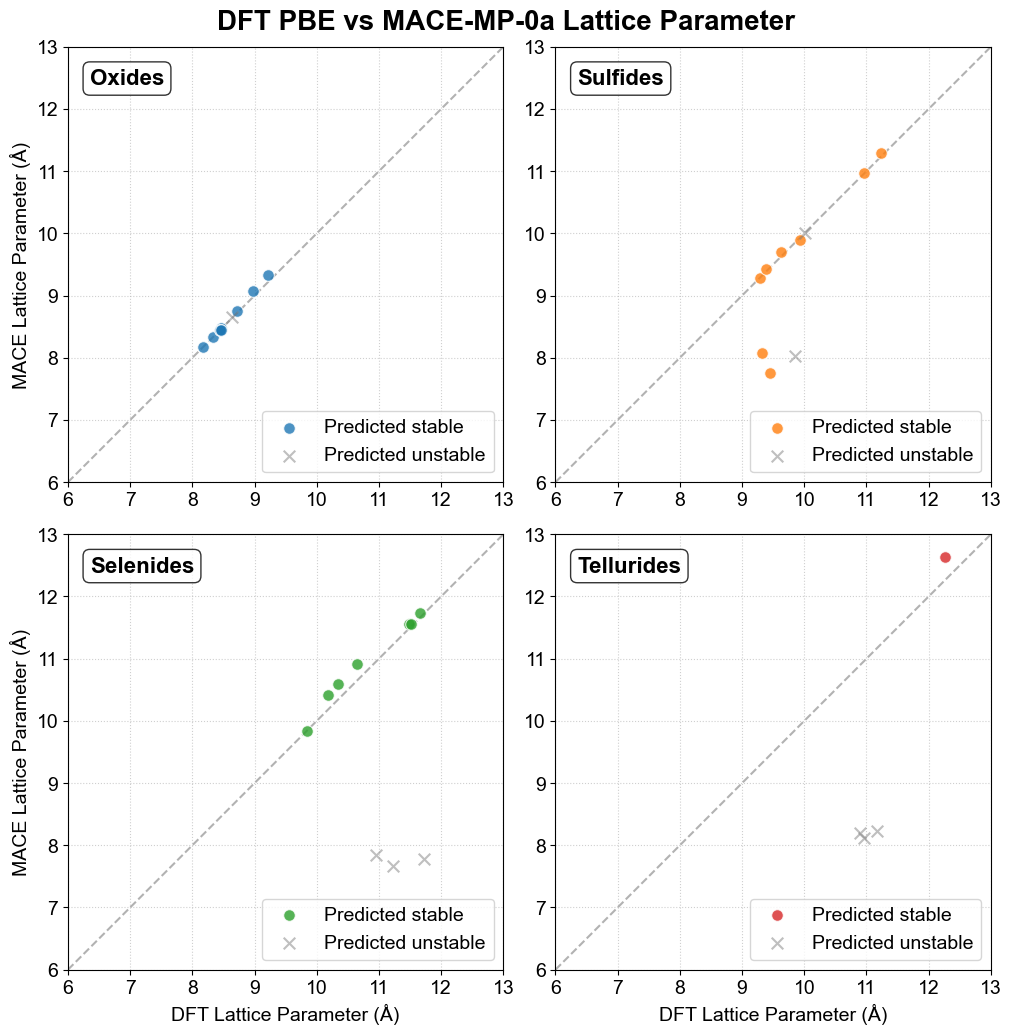

In [37]:
# Use ARIAL font family
fm.fontManager.addfont('../font/ARIAL.TTF')
plt.rcParams['font.family'] = 'Arial'

# Setup Data
datasets = [df_oxides, df_sulfides, df_selenides, df_tellurides]
legend_labels = ['Oxides', 'Sulfides', 'Selenides', 'Tellurides']

# Set colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
fig.suptitle('DFT PBE vs MACE-MP-0a Lattice Parameter', fontsize=20, weight='bold', y=1.02)

# Global settings
axis_min, axis_max = 6, 13
x_line = np.linspace(axis_min, axis_max, 100)

for idx, (ax, data, label, color) in enumerate(zip(axs.flat, datasets, legend_labels, colors)):
    # Extract data
    x_val = data['DFT-Lattice']
    y_val = data['MACE-Lattice']
    x_val_success = data[data['SuperScore']>=0]['DFT-Lattice']
    y_val_success = data[data['SuperScore']>=0]['MACE-Lattice']
    x_val_fail = data[data['SuperScore'].isna()]['DFT-Lattice']
    y_val_fail = data[data['SuperScore'].isna()]['MACE-Lattice']
    
    # # Calculate Error
    # mae = mean_absolute_error(x_val, y_val)
    # rmse = np.sqrt(mean_squared_error(x_val, y_val))
    
    # Identity line (y=x)
    ax.plot(x_line, x_line, 'k--', alpha=0.3, zorder=1, lw=1.5)
    
    # Scatter plots
    ax.scatter(x_val_success, y_val_success, 
               label=f'Predicted stable', 
               c=color, 
               s=70, 
               alpha=0.8, 
               edgecolors='white', 
               linewidth=0.8,
               zorder=2)
    
    ax.scatter(x_val_fail, y_val_fail, 
               label=f'Predicted unstable', 
               c='grey', 
               s=70, 
               alpha=0.5, 
               marker='x',
               zorder=2)
    
    # Styling
    ax.set_xlim(axis_min, axis_max)
    ax.set_ylim(axis_min, axis_max)
    ax.set_aspect('equal', adjustable='box') # Forces a square plot
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize=16,
            horizontalalignment='left', verticalalignment='top', weight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
#    # Add Error Metrics Text Box
#     text_str = f'MAE: {mae:.2f} Å\nRMSE: {rmse:.2f} Å'
#     ax.text(0.05, 0.85, text_str, transform=ax.transAxes, fontsize=14,
#             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    # Legend
    ax.legend(loc='lower right', frameon=True, fontsize=14)
    
    # Labeling
    # Check if it's the bottom row
    if idx >= 2:
        ax.set_xlabel('DFT Lattice Parameter (Å)', fontsize=14, weight='medium')
    
    # Check if it's the left column
    if idx % 2 == 0:
        ax.set_ylabel('MACE Lattice Parameter (Å)', fontsize=14, weight='medium')
        
# Show plot
plt.savefig('MACE_vs_DFT_Lattice_Parameters_ParityPlot.pdf', bbox_inches='tight')
plt.show()

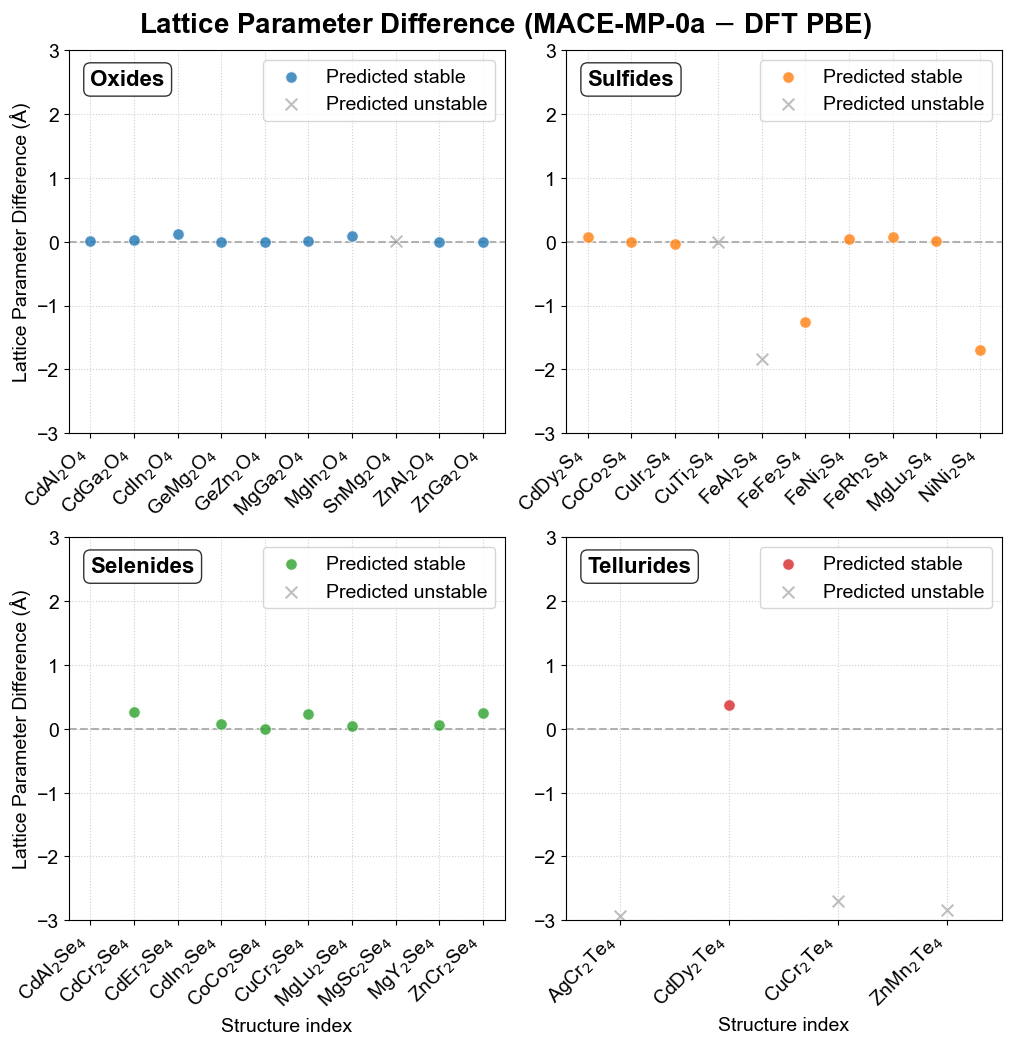

In [38]:
fm.fontManager.addfont('../font/ARIAL.TTF')
plt.rcParams['font.family'] = 'Arial'

# Setup Data
datasets = [df_oxides, df_sulfides, df_selenides, df_tellurides]
legend_labels = ['Oxides', 'Sulfides', 'Selenides', 'Tellurides']

# Set colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
fig.suptitle('Lattice Parameter Difference (MACE-MP-0a $-$ DFT PBE)', fontsize=20, weight='bold', y=1.03)

axis_min, axis_max = -3, 3

for idx, (ax, data, label, color) in enumerate(zip(axs.flat, datasets, legend_labels, colors)):
    # Extract data
    x_val = np.arange(len(data))
    y_val = data['Diff-Lattice']
    x_val_success = data[data['SuperScore']>=0].index
    y_val_success = data[data['SuperScore']>=0]['Diff-Lattice']
    x_val_fail = data[data['SuperScore'].isna()].index
    y_val_fail = data[data['SuperScore'].isna()]['Diff-Lattice']
    
    # # Calculate Error
    # mae = mean_absolute_error(data['DFT-Lattice'], data['MACE-Lattice'])
    # rmse = np.sqrt(mean_squared_error(data['DFT-Lattice'], data['MACE-Lattice']))
    
    # y=0 line
    ax.axhline(0, color='k', linestyle='--', alpha=0.3, zorder=1, lw=1.5)

    # Scatter plots
    ax.scatter(x_val_success, y_val_success, 
               label=f'Predicted stable', 
               c=color, 
               s=70, 
               alpha=0.8, 
               edgecolors='white', 
               linewidth=0.8,
               zorder=2)
    
    ax.scatter(x_val_fail, y_val_fail, 
               label=f'Predicted unstable', 
               c='grey', 
               s=70, 
               alpha=0.5, 
               marker='x',
               zorder=2)
    
    # Styling
    ax.set_xlim(-0.5, len(data)-0.5)
    ax.set_ylim(axis_min, axis_max)
    ax.set_xticks(range(len(data)))
    
    ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize=16,
            horizontalalignment='left', verticalalignment='top', weight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Chemical formatting for labels
    # Converts "MgAl2O4" to "MgAl$_2$O$_4$"
    formatted_labels = [re.sub(r'(\d+)', r'$_{\1}$', formula) for formula in data['Formula']]
    ax.set_xticklabels(formatted_labels, rotation=45, ha='right')

    ax.grid(True, linestyle=':', alpha=0.6)
    
#    # Add Error Metrics Text Box
#     text_str = f'MAE: {mae:.2f} Å\nRMSE: {rmse:.2f} Å'
#     ax.text(0.05, 0.05, text_str, transform=ax.transAxes, fontsize=14,
#             verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.legend(loc='upper right' ,fontsize=14)
    
    if idx >= 2:
        ax.set_xlabel('Structure index', fontsize=14, weight='medium')
    if idx % 2 == 0:
        ax.set_ylabel('Lattice Parameter Difference (Å)', fontsize=14, weight='medium')

plt.savefig('MACE_vs_DFT_Lattice_Parameter_Differences.pdf', bbox_inches='tight')
plt.show()

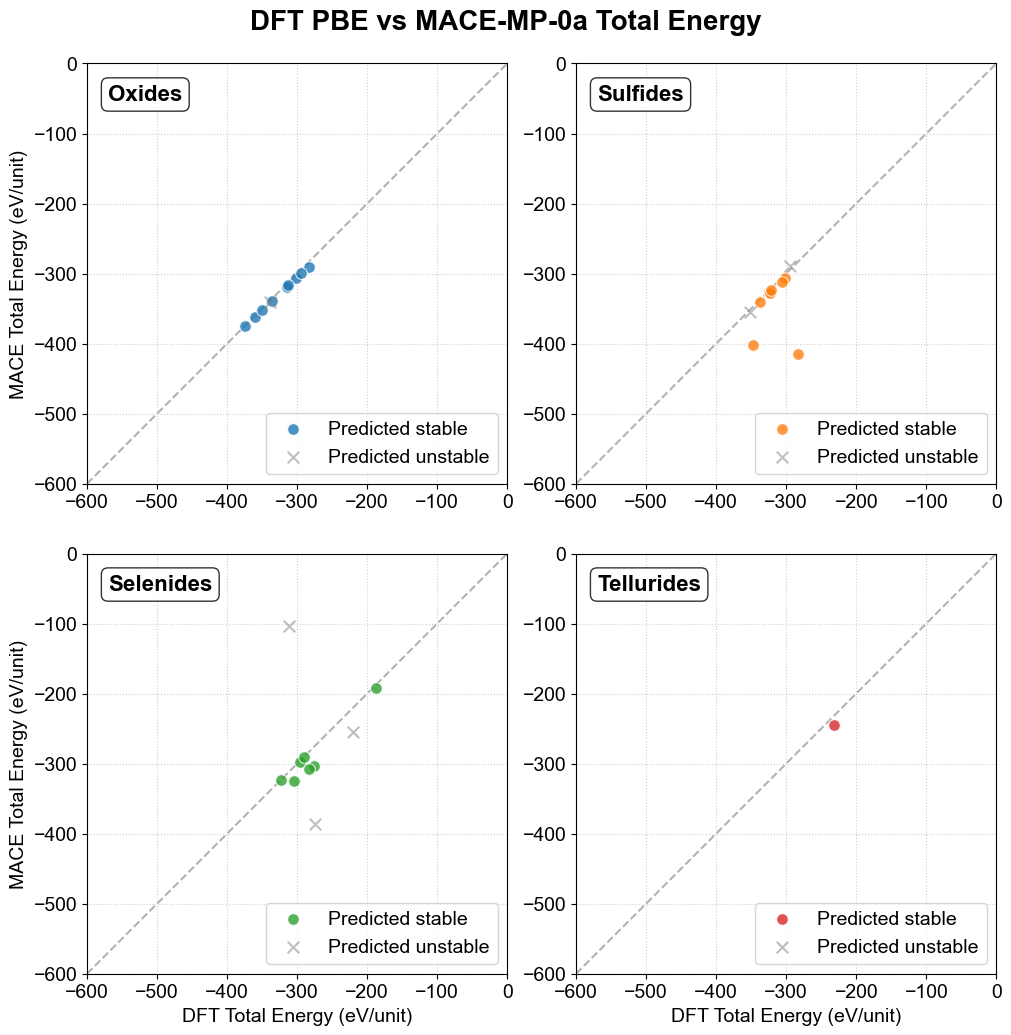

In [39]:
# Use a clean font family (e.g., sans-serif like Arial or Helvetica)
fm.fontManager.addfont('../font/ARIAL.TTF')
plt.rcParams['font.family'] = 'Arial'

# Setup Data
datasets = [df_oxides, df_sulfides, df_selenides, df_tellurides]
legend_labels = ['Oxides', 'Sulfides', 'Selenides', 'Tellurides']

# Set colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
fig.suptitle('DFT PBE vs MACE-MP-0a Total Energy', fontsize=20, weight='bold', y=1.02)

# Global settings
axis_min, axis_max = -600, 0
x_line = np.linspace(axis_min, axis_max, 100)

for idx, (ax, data, label, color) in enumerate(zip(axs.flat, datasets, legend_labels, colors)):
    
    # Extract data
    x_val = data['DFT-Energy']
    y_val = data['MACE-Energy']
    x_val_success = data[data['SuperScore']>=0]['DFT-Energy']
    y_val_success = data[data['SuperScore']>=0]['MACE-Energy']
    x_val_fail = data[data['SuperScore'].isna()]['DFT-Energy']
    y_val_fail = data[data['SuperScore'].isna()]['MACE-Energy']
    
    # # Calculate Error
    # mae = mean_absolute_error(x_val, y_val)
    # rmse = np.sqrt(mean_squared_error(x_val, y_val))
    
    # Identity line (y=x)
    ax.plot(x_line, x_line, 'k--', alpha=0.3, zorder=1, lw=1.5)
    
    # Scatter plots
    ax.scatter(x_val_success, y_val_success, 
               label=f'Predicted stable', 
               c=color, 
               s=70, 
               alpha=0.8, 
               edgecolors='white', 
               linewidth=0.8,
               zorder=2)
    
    ax.scatter(x_val_fail, y_val_fail, 
               label=f'Predicted unstable', 
               c='grey', 
               s=70, 
               alpha=0.5, 
               marker='x',
               zorder=2)
    
    # Styling
    ax.set_xlim(axis_min, axis_max)
    ax.set_ylim(axis_min, axis_max)
    ax.set_aspect('equal', adjustable='box') # Forces a square plot
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize=16,
            horizontalalignment='left', verticalalignment='top', weight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
#    # Add Error Metrics Text Box
#     text_str = f'MAE: {mae:.2f} eV/unit\nRMSE: {rmse:.2f} eV/unit'
#     ax.text(0.05, 0.85, text_str, transform=ax.transAxes, fontsize=14,
#             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    # Legend
    ax.legend(loc='lower right', frameon=True, fontsize=14)
    
    # Labeling
    # Check if it's the bottom row
    if idx >= 2:
        ax.set_xlabel('DFT Total Energy (eV/unit)', fontsize=14, weight='medium')
    
    # Check if it's the left column
    if idx % 2 == 0:
        ax.set_ylabel('MACE Total Energy (eV/unit)', fontsize=14, weight='medium')
# Show plot
plt.savefig('MACE_vs_DFT_Total_Energies_ParityPlot.pdf', bbox_inches='tight')
plt.show()

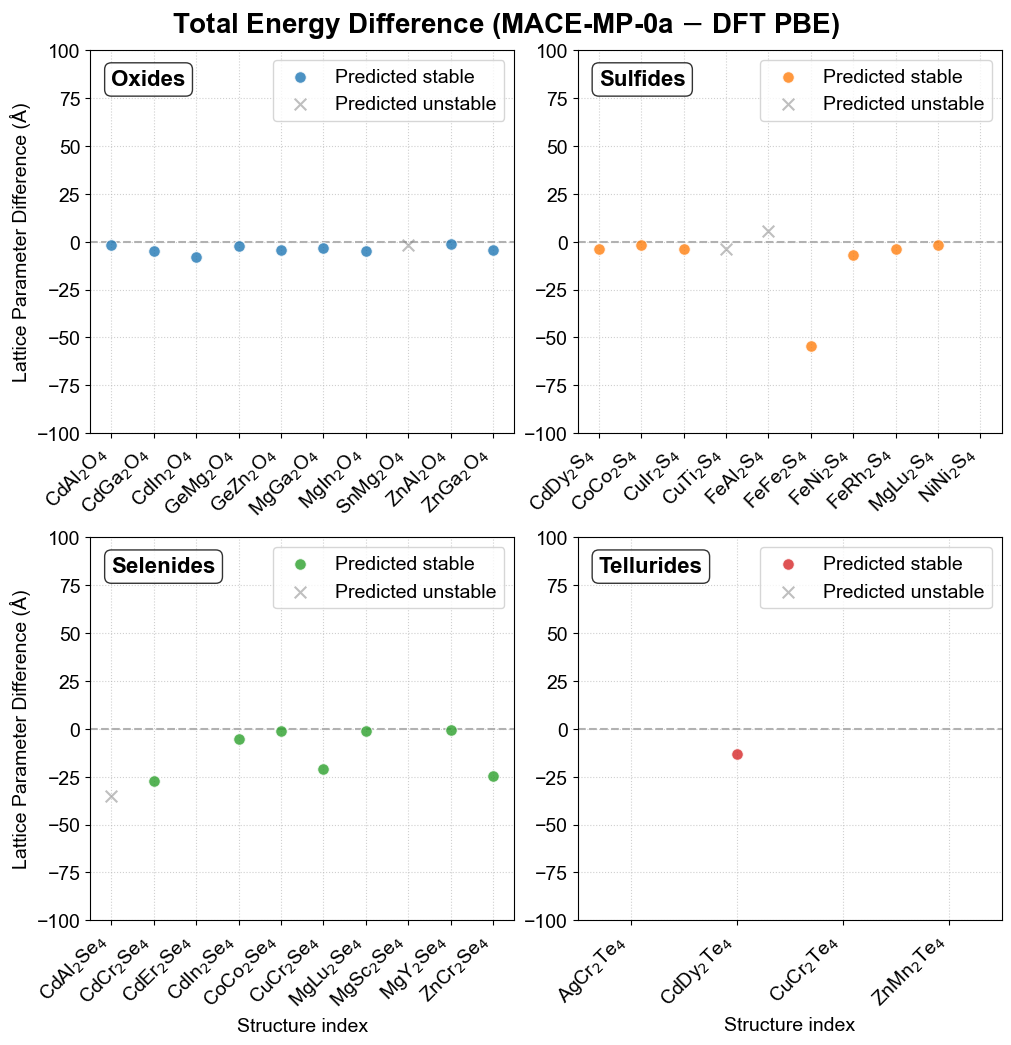

In [40]:
# Use a clean font family (e.g., sans-serif like Arial or Helvetica)
fm.fontManager.addfont('../font/ARIAL.TTF')
plt.rcParams['font.family'] = 'Arial'

# Setup Data
datasets = [df_oxides, df_sulfides, df_selenides, df_tellurides]
legend_labels = ['Oxides', 'Sulfides', 'Selenides', 'Tellurides']

# Set colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
fig.suptitle('Total Energy Difference (MACE-MP-0a $-$ DFT PBE)', fontsize=20, weight='bold', y=1.03)

# Global settings
axis_min, axis_max = -100, 100
x_line = np.linspace(axis_min, axis_max, 100)

for idx, (ax, data, label, color) in enumerate(zip(axs.flat, datasets, legend_labels, colors)):
    # Extract data
    x_val = np.arange(len(data))
    y_val = data['Diff-Energy']
    x_val_success = data[data['SuperScore']>=0].index
    y_val_success = data[data['SuperScore']>=0]['Diff-Energy']
    x_val_fail = data[data['SuperScore'].isna()].index
    y_val_fail = data[data['SuperScore'].isna()]['Diff-Energy']
    
    # # Calculate Error
    # mae = mean_absolute_error(data['DFT-Energy'], data['MACE-Energy'])
    # rmse = np.sqrt(mean_squared_error(data['DFT-Energy'], data['MACE-Energy']))
    
    # y=0 line
    ax.axhline(0, color='k', linestyle='--', alpha=0.3, zorder=1, lw=1.5)
    
    # Scatter plots
    ax.scatter(x_val_success, y_val_success, 
               label=f'Predicted stable', 
               c=color, 
               s=70, 
               alpha=0.8, 
               edgecolors='white', 
               linewidth=0.8,
               zorder=2)
    
    ax.scatter(x_val_fail, y_val_fail, 
               label=f'Predicted unstable', 
               c='grey', 
               s=70, 
               alpha=0.5, 
               marker='x',
               zorder=2)
    
    # Styling
    ax.set_xlim(-0.5, len(data)-0.5)
    ax.set_ylim(axis_min, axis_max)
    ax.set_xticks(range(len(data)))
    ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize=16,
            horizontalalignment='left', verticalalignment='top', weight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Chemical formatting for labels
    # Converts "MgAl2O4" to "MgAl$_2$O$_4$"
    formatted_labels = [re.sub(r'(\d+)', r'$_{\1}$', formula) for formula in data['Formula']]
    ax.set_xticklabels(formatted_labels, rotation=45, ha='right')

    ax.grid(True, linestyle=':', alpha=0.6)

    # # Add Error Metrics Text Box
    # text_str = f'MAE: {mae:.2f} eV/unit\nRMSE: {rmse:.2f} eV/unit'
    # ax.text(0.05, 0.05, text_str, transform=ax.transAxes, fontsize=14,
    #         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    # Legend
    ax.legend(loc='upper right' ,fontsize=14)

    # Labeling
    # Check if it's the bottom row
    if idx >= 2: 
        ax.set_xlabel('Structure index', fontsize=14, weight='medium')

    # Check if it's the left column
    if idx % 2 == 0: 
        ax.set_ylabel('Lattice Parameter Difference (Å)', fontsize=14, weight='medium')
        
# Show plot
plt.savefig('MACE_vs_DFT_Total_Energy_Differences.pdf', bbox_inches='tight')
plt.show()